# IMMIGRATION AND CRIME IN SPAIN

In [15]:
import pandas as pd
import numpy as np
from plotnine import *
from great_tables import *

In Spain all days the newspapers speak about the immigration and Crime and assume that there is a strong correlation between them. The topic one to one. Let start to the immigration issue

## Immigration

The dataset have been got of INE (stasts national institute os Spain)

In [16]:
immigration = pd.read_csv("database/inmigrantes.csv", sep=";", encoding='latin-1')

First let to convert the *immigration* dataframe in more friendly dataframe

In [3]:
# Clean and transform the 'inmigracion' DataFrame

mapping = {'á': 'a', 'é': 'e', 'í': 'i', 'ó': 'o', 'ú': 'u', 'Á': 'A', 'É': 'E', 'Í': 'I', 'Ó': 'O', 'Ú': 'U',
           'De ': '', 'De centro': ''}


immigration = (
    immigration
    .rename(columns={'Comunidades y ciudades autónomas': 'comunidad', # rename vars
                                            'Periodo':'year',
                                            'Nacionalidad':'nacionalidad',
                                            'Total':'personas'})
    .assign(
        nacionalidad=lambda x: x['nacionalidad'].str.replace(mapping, regex=True).str.lower().str.strip(),## clean nacionalidad
        year=lambda x: x['year'].str.replace('1 de enero de ', ''), ## clean year
        comunidad=lambda x: x['comunidad'].str.replace(r"\d+ ", "", regex=True)) ## clean comunidad
    .assign(
        year=lambda x: x['year'].astype(int),
        ESP = lambda x: x['nacionalidad'] == 'Española'
        )        

    .query('personas.notna()')## remove NA
)


And create and table **Variables in the Dataset** with the types of column, *values* and *quantity of values*

In [4]:
summary = pd.DataFrame({
    'Type': immigration.dtypes,
    'Unique_Values': [immigration[col].unique().tolist() for col in immigration.columns],
})

# 2. Add the count column by referencing the summary column you just created
summary['n_Values'] = summary['Unique_Values'].apply(len)

summary.iat[3, 1] = 100

# 4: Length of DataFrame
immigration_length = len(immigration)

In [5]:
(
    GT(summary)
    .tab_header(
        title = "Variables in the Dataset")
    )

GT(_tbl_data=                 Type                                      Unique_Values  \
comunidad         str  [andalucia, aragon, asturias, baleares, canari...   
nacionalidad      str  [española, pais de la ue28 sin españa, africa,...   
year            int64  [2025, 2024, 2023, 2022, 2021, 2020, 2019, 201...   
personas      float64                                                100   
ESP              bool                                            [False]   

              n_Values  
comunidad           19  
nacionalidad         5  
year                11  
personas           935  
ESP                  1  , _body=<great_tables._gt_data.Body object at 0x0000019153A04AD0>, _boxhead=Boxhead([ColInfo(var='Type', type=<ColInfoTypeEnum.default: 1>, column_label='Type', column_align='right', column_width=None), ColInfo(var='Unique_Values', type=<ColInfoTypeEnum.default: 1>, column_label='Unique_Values', column_align='right', column_width=None), ColInfo(var='n_Values', type=<ColInfoTypeEnum.default: 1>, column_label='n_Values', column_align='right', column_width=None)]), _stub=<great_tables._gt_data.Stub object at 0x0000019153A04830>, _spanners=Spanners([]), _heading=Heading(title='Variables in the Dataset', subtitle=None, preheader=None), _stubhead=None, _summary_rows=<great_tables._gt_data.SummaryRows object at 0x0000019153A04EC0>, _summary_rows_grand=<great_tables._gt_data.SummaryRows object at 0x0000019153D479D0>, _source_notes=[], _footnotes=[], _styles=[], _locale=<great_tables._gt_data.Locale object at 0x0000019153A05010>, _formats=[], _substitutions=[], _options=Options(table_id=OptionsInfo(scss=False, category='table', type='value', value=None), table_caption=OptionsInfo(scss=False, category='table', type='value', value=None), table_width=OptionsInfo(scss=True, category='table', type='px', value='auto'), table_layout=OptionsInfo(scss=True, category='table', type='value', value='fixed'), table_margin_left=OptionsInfo(scss=True, category='table', type='px', value='auto'), table_margin_right=OptionsInfo(scss=True, category='table', type='px', value='auto'), table_background_color=OptionsInfo(scss=True, category='table', type='value', value='#FFFFFF'), table_additional_css=OptionsInfo(scss=False, category='table', type='values', value=[]), table_font_names=OptionsInfo(scss=False, category='table', type='values', value=['-apple-system', 'BlinkMacSystemFont', 'Segoe UI', 'Roboto', 'Oxygen', 'Ubuntu', 'Cantarell', 'Helvetica Neue', 'Fira Sans', 'Droid Sans', 'Arial', 'sans-serif']), table_font_size=OptionsInfo(scss=True, category='table', type='px', value='16px'), table_font_weight=OptionsInfo(scss=True, category='table', type='value', value='normal'), table_font_style=OptionsInfo(scss=True, category='table', type='value', value='normal'), table_font_color=OptionsInfo(scss=True, category='table', type='value', value='#333333'), table_font_color_light=OptionsInfo(scss=True, category='table', type='value', value='#FFFFFF'), table_border_top_include=OptionsInfo(scss=False, category='table', type='boolean', value=True), table_border_top_style=OptionsInfo(scss=True, category='table', type='value', value='solid'), table_border_top_width=OptionsInfo(scss=True, category='table', type='px', value='2px'), table_border_top_color=OptionsInfo(scss=True, category='table', type='value', value='#A8A8A8'), table_border_right_style=OptionsInfo(scss=True, category='table', type='value', value='none'), table_border_right_width=OptionsInfo(scss=True, category='table', type='px', value='2px'), table_border_right_color=OptionsInfo(scss=True, category='table', type='value', value='#D3D3D3'), table_border_bottom_include=OptionsInfo(scss=False, category='table', type='boolean', value=True), table_border_bottom_style=OptionsInfo(scss=True, category='table', type='value', value='solid'), table_border_bottom_width=OptionsInfo(scss=True, category='table', type='px', value='2px'), table_border_bottom_color=OptionsInfo(scss=True, category='table', type='valu

## HOW IS THE POPULATION AND IMMIGRATION BY **COMUNIDAD**

In a simple *dataframe* summary the result of database *inmigracion*

In [6]:
df_summary = (immigration
                .assign(poblacion=lambda x: x.groupby(['comunidad', 'year'])['personas'].transform(lambda y: y.sum()),
                       pct_total=lambda x: x.groupby(['comunidad', 'year'])['personas'].transform(lambda y: y / y.sum()),
                       pct_esp=lambda x: x.groupby(['comunidad', 'year', 'ESP'])['pct_total'].transform(sum))
                .query('ESP == False')
            )

Let to do two graph 
* TOP 10 **COMUNIDADES** WITH THE HIGHEST POPULATION
* TOP 10 **COMUNIDADES** WITH THE HIGHEST PERCENTAGE OF IMMIGRATION

### TOP 10 MOST POPULATED *COMUNIDADES*
The big cities have more pressure demographic and more troubles

In [7]:
population_10 = (
    df_summary
    .query('nacionalidad == "española"')
    .groupby('comunidad')['poblacion'].mean()
    .rank(ascending=False, method='max')
    .sort_values(ascending=True)
    .head(10)
    .to_frame().reset_index().rename(columns={'poblacion':'rank population'})
)


population_10


,comunidad,rank population
0,andalucia,1.0
1,cataluna,2.0
2,madrid,3.0
3,valencia,4.0
4,galicia,5.0
5,castillayleon,6.0
6,vascos,7.0
7,canarias,8.0
8,castillalamancha,9.0
9,murcia,10.0


In [8]:
population_10 = df_summary[(df_summary['comunidad'].isin(list(population_10['comunidad']))) &
            (df_summary['nacionalidad'] != 'española')]

population_10

mean_order_population_10 = (
    population_10.groupby('comunidad')['poblacion']
    .mean()
    .sort_values(ascending=False)
    .index.tolist()
)

population_10['comunidad'] = pd.Categorical(population_10['comunidad'], 
                                            categories=mean_order_population_10, 
                                            ordered=True)

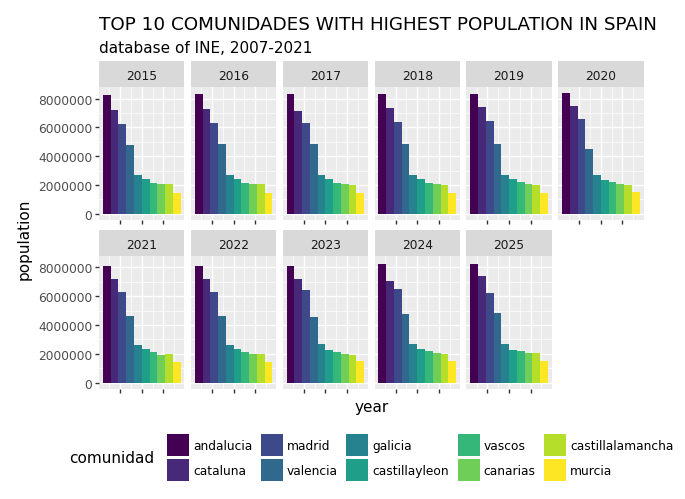

In [9]:
from mizani.formatters import percent_format

(
    population_10
    .pipe(lambda x: ggplot(x, aes('year', 'poblacion', fill='comunidad')) +
          geom_col(position=position_dodge()) +
          facet_wrap('year', scales='free_x', nrow=2) +
          theme(legend_position='bottom', 
          axis_text_x= element_blank()) +
          labs(title='TOP 10 COMUNIDADES WITH HIGHEST POPULATION IN SPAIN',
                subtitle='database of INE, 2007-2021',
                x='year',
                y='population')
                )
)

### TOP 10 **COMUNIDADES** WITH THE HIGHEST PERCENTAGE OF IMMIGRATION

In [10]:
x = (df_summary
    .query('nacionalidad != "española"')
    .groupby('comunidad')['pct_total'].mean()
    .rank(method='max')
    .sort_values(ascending=True)
    .head(10)
    .to_frame().reset_index().rename(columns={'pct_total':'rank immigration'})
    )


In [11]:
pct_10 = (df_summary
    .query('nacionalidad != "española"')
    .groupby('comunidad')['pct_total'].mean()
    .rank(method='max')
    .sort_values(ascending=True)
    .head(10)
    .to_frame().reset_index().rename(columns={'pct_total':'rank immigration'})
    )

mean_order_pct_10 = (
    df_summary.groupby('comunidad')['pct_total']
    .mean()
    .sort_values(ascending=False)
    .index.tolist()
)

pct_10['comunidad'] = pd.Categorical(pct_10['comunidad'], 
                                            categories=mean_order_pct_10, 
                                            ordered=True)



In [12]:
(
    GT(pct_10)
    .tab_header(title = "Top 10 most percentage of immigration")
    .fmt_number('rank immigration', decimals=0)
    )

GT(_tbl_data=          comunidad  rank immigration
0       extremadura               1.0
1           galicia               2.0
2          asturias               3.0
3     castillayleon               4.0
4         andalucia               5.0
5            vascos               6.0
6         cantabria               7.0
7  castillalamancha               8.0
8           navarra               9.0
9          canarias              10.0, _body=<great_tables._gt_data.Body object at 0x00000191554ADF30>, _boxhead=Boxhead([ColInfo(var='comunidad', type=<ColInfoTypeEnum.default: 1>, column_label='comunidad', column_align='center', column_width=None), ColInfo(var='rank immigration', type=<ColInfoTypeEnum.default: 1>, column_label='rank immigration', column_align='right', column_width=None)]), _stub=<great_tables._gt_data.Stub object at 0x0000019153D47ED0>, _spanners=Spanners([]), _heading=Heading(title='Top 10 most percentage of immigration', subtitle=None, preheader=None), _stubhead=None, _summary_rows=<great_tables._gt_data.SummaryRows object at 0x0000019155736990>, _summary_rows_grand=<great_tables._gt_data.SummaryRows object at 0x00000191554AC9D0>, _source_notes=[], _footnotes=[], _styles=[], _locale=<great_tables._gt_data.Locale object at 0x0000019155736AD0>, _formats=[<great_tables._gt_data.FormatInfo object at 0x00000191556EBE00>], _substitutions=[], _options=Options(table_id=OptionsInfo(scss=False, category='table', type='value', value=None), table_caption=OptionsInfo(scss=False, category='table', type='value', value=None), table_width=OptionsInfo(scss=True, category='table', type='px', value='auto'), table_layout=OptionsInfo(scss=True, category='table', type='value', value='fixed'), table_margin_left=OptionsInfo(scss=True, category='table', type='px', value='auto'), table_margin_right=OptionsInfo(scss=True, category='table', type='px', value='auto'), table_background_color=OptionsInfo(scss=True, category='table', type='value', value='#FFFFFF'), table_additional_css=OptionsInfo(scss=False, category='table', type='values', value=[]), table_font_names=OptionsInfo(scss=False, category='table', type='values', value=['-apple-system', 'BlinkMacSystemFont', 'Segoe UI', 'Roboto', 'Oxygen', 'Ubuntu', 'Cantarell', 'Helvetica Neue', 'Fira Sans', 'Droid Sans', 'Arial', 'sans-serif']), table_font_size=OptionsInfo(scss=True, category='table', type='px', value='16px'), table_font_weight=OptionsInfo(scss=True, category='table', type='value', value='normal'), table_font_style=OptionsInfo(scss=True, category='table', type='value', value='normal'), table_font_color=OptionsInfo(scss=True, category='table', type='value', value='#333333'), table_font_color_light=OptionsInfo(scss=True, category='table', type='value', value='#FFFFFF'), table_border_top_include=OptionsInfo(scss=False, category='table', type='boolean', value=True), table_border_top_style=OptionsInfo(scss=True, category='table', type='value', value='solid'), table_border_top_width=OptionsInfo(scss=True, category='table', type='px', value='2px'), table_border_top_color=OptionsInfo(scss=True, category='table', type='value', value='#A8A8A8'), table_border_right_style=OptionsInfo(scss=True, category='table', type='value', value='none'), table_border_right_width=OptionsInfo(scss=True, category='table', type='px', value='2px'), table_border_right_color=OptionsInfo(scss=True, category='table', type='value', value='#D3D3D3'), table_border_bottom_include=OptionsInfo(scss=False, category='table', type='boolean', value=True), table_border_bottom_style=OptionsInfo(scss=True, category='table', type='value', value='solid'), table_border_bottom_width=OptionsInfo(scss=True, category='table', type='px', value='2px'), table_border_bottom_color=OptionsInfo(scss=True, category='table', type='value', value='#A8A8A8'), table_border_left_style=OptionsInfo(scss=True, category='table', type='value', value='none'), table_border_left_width=OptionsInfo(scss=True, category='table', type='px', value='2px'), table_border_lef

In [13]:
pct_10 = df_summary[(df_summary['comunidad'].isin(list(pct_10['comunidad']))) &
            (df_summary['nacionalidad'] != 'española')]

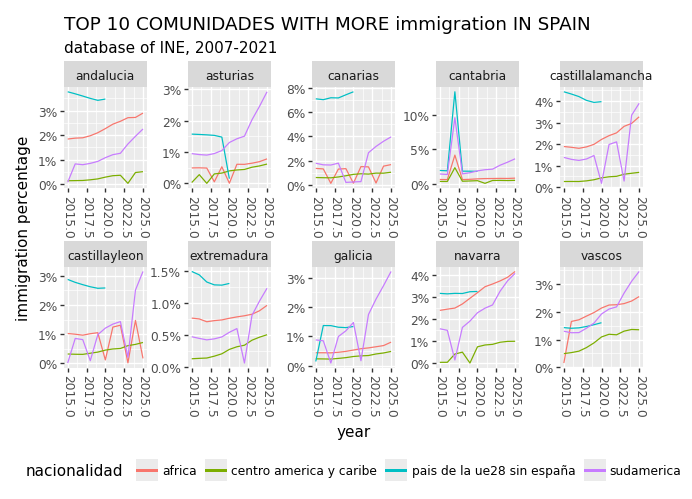

In [14]:
from mizani.formatters import percent_format

(
    pct_10
    .pipe(lambda x: ggplot(x, aes('year', 'pct_total', color='nacionalidad')) +
          geom_line() +
          facet_wrap('comunidad', nrow=2, scales='free') +
          scale_y_continuous(labels=percent_format()) +
          theme(legend_position='bottom', axis_text_x= element_text(angle=270)) +
          labs(title='TOP 10 COMUNIDADES WITH MORE immigration IN SPAIN',
                subtitle='database of INE, 2007-2021',
                x='year',
                y='immigration percentage')
                )
)

In the graph 'TOP 10 COMUNIDADES WITH MORE immigration IN SPAIN' see several failures